# References

*   Vectice Documentation: https://docs.vectice.com/ </br>
*   Vectice API documentation: https://api-docs.vectice.com/


## Install the latest Vectice Python client library

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install vectice

## Get started by connecting to Vectice

In [43]:
import vectice

vct = vectice.connect(api_token="my_api_token") #Put your API token as explained in the Quickstart documentation

Welcome, bryan. You`re now successfully connected to Vectice.

To access your personal workspace, use connection.my_workspace
To access a specific workspace, use connection.workspace(Workspace ID)
To get a list of workspaces you can access and their IDs, use connection.list_workspaces()

If you are using a notebook you can call the help by using a Vectice returned object with the builtin notebook "?":
>> connection?

If you are using an IDE you can call the help() method on any object returned by Vectice:
>> help(connection)

For quick access to your default workspace in the Vectice web app, visit:
https://qa.vectice.com/browse/workspace/WSP-4953


## Specify which project phase you want to document

In Vectice UI, navigate to your personal workspace inside your default Tutorial project go to the modeling phase and copy paste your Phase Id below.

In [44]:
phase = vct.phase('PHA-xxxx') #Your Phase Id

Phase 'Modeling' successfully retrieved."

For quick access to the Phase in the Vectice web app, visit:
https://qa.vectice.com/browse/phase/PHA-35890


## Next we are going to create an iteration

### An iteration allows you to organize your work in repeatable sequences of steps. You can have multiple iteration within a phase

In [45]:
iteration = phase.create_iteration()

New Iteration number '3' created.

For quick access to the Iteration in the Vectice web app, visit:
https://qa.vectice.com/browse/iteration/ITR-25083


## Use these 3 main type of items that we can register within an iteration

### Push a comment

In [46]:
iteration.step_build_model += "My first log into Vectice"

Added Comment to Step: Build Model

Link to Step: https://qa.vectice.com/browse/iteration/ITR-25083



### Push a dataset with an image as attachements

Use the following code block to create a local dataset and generate an image:

In [47]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]
df_iris.to_csv('cleaned_dataset.csv')

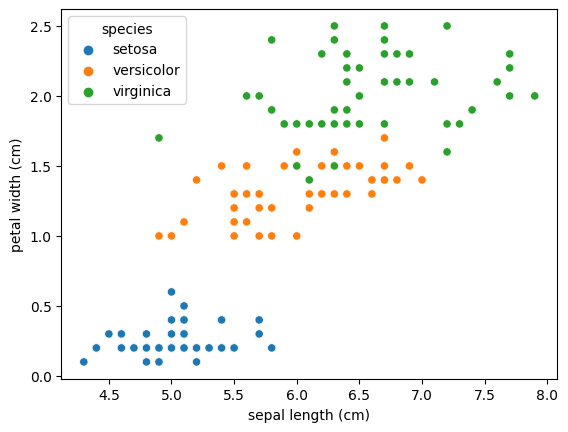

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_iris, x='sepal length (cm)',
                y='petal width (cm)', hue='species')
plt.plot()
plt.savefig('Scatter_plot_iris.png')

Register dataset metadata and statistics to Vectice

In [49]:
from vectice import Dataset, FileResource

clean_dataset = Dataset.clean(name="Cleaned Dataset", resource=FileResource(paths="cleaned_dataset.csv", dataframes=df_iris), attachments='Scatter_plot_iris.png')

iteration.step_build_model += clean_dataset

File: cleaned_dataset.csv wrapped successfully.
Code captured the following changed files; 23.2/QuickStart.ipynb, 23.2/tutorial/Modeling_LR.ipynb
New Version: 'Version 1' of Dataset: 'Cleaned Dataset' added to Step: Build Model
Attachments: Scatter_plot_iris.png
Link to Step: https://qa.vectice.com/browse/iteration/ITR-25083



### You can verify what was saved in Vectice by clicking on the UI link above

### Push a model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model (with the default parameter)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(df_iris[iris.feature_names],df_iris["species"])

KNeighborsClassifier()

In [51]:
from vectice import Model

iteration.step_build_model += Model(library="scikit-learn", technique="linear regression", name="Unit Sales Predictor", predictor=knn, properties=knn.get_params(), derived_from=[clean_dataset.latest_version_id])

Model KNeighborsClassifier successfully attached to Model(name='Unit Sales Predictor', version='Version 3').
New Version: 'Version 3' of Model: 'Unit Sales Predictor' added to Step: Build Model
Attachments: None
Link to Step: https://qa.vectice.com/browse/iteration/ITR-25083



#### ✴ You can view your registered assets and comments in the UI by clicking the links in the output messages. 

## 🥇 Congrats! Learn how to use the Vectice UI by viewing our [Vectice UI Tuturial Project](https://https://docs.vectice.com/getting-started/tutorial).